In [42]:
!pip install haversine
!pip install pandas
!pip install weather_au

In [23]:
import sys
import datetime
import requests
import smtplib
import csv

import pandas as pd
import matplotlib.pyplot as plt

from weather_au import api
from IPython.display import IFrame
import haversine as hs
from haversine import Unit
#https://developers.google.com/maps/documentation/embed/embedding-map#choosing_map_modes
#https://developers.google.com/maps/documentation/embed/get-started


In [24]:
#read csv from here and take experimental data

import pandas as pd
df = pd.read_csv ('~\Documents\Arduino\MPE LoRa\Log_Files\Test.csv',sep=',')

df

,Time,Number,S_Lat,S_Long,Bandwidth,CodingRate,Frequency,SpreadingFactor,TxPower,PacketRSSI,RSSI,SNR,R_Lat,R_Long
0,7:57:30,1,-31.707623,115.793190,500000,5,915000000,12,20,-108,-86,-20.75,-31.708048,115.788574
1,7:57:48,2,-31.707628,115.793198,500000,5,915000000,12,20,-109,-124,-19.50,-31.708052,115.788559
2,7:57:50,3,-31.707647,115.793221,500000,5,915000000,12,20,-108,-124,-18.75,-31.708054,115.788559
3,7:57:52,4,-31.707632,115.793228,500000,5,915000000,12,20,-109,-127,-22.00,-31.708050,115.788559
4,7:57:58,19,-31.708961,115.792656,500000,5,915000000,12,20,-109,-108,-15.50,-31.708042,115.788567
5,7:58:27,23,-31.709429,115.791618,500000,5,915000000,12,20,-109,-94,-14.75,-31.708055,115.788559
6,7:58:29,24,-31.709459,115.791336,500000,5,915000000,12,20,-108,-88,-14.00,-31.708050,115.788559
7,7:58:34,26,-31.709372,115.790649,500000,5,915000000,12,20,-107,-126,-7.00,-31.708057,115.788559
8,7:58:36,27,-31.709343,115.790428,500000,5,915000000,12,20,-108,-128,-11.00,-31.708057,115.788559
9,7:58:40,30,-31.709227,115.789963,500000,5,915000000,12,20,-107,-97,-10.25,-31.708059,115.788559


In [25]:
dist = {'Distance': []}

for x in df.index:
    
    receiver_lat = float(df["R_Lat"][x])
    receiver_long = float(df["R_Long"][x])
    receiver = str(receiver_lat) + "," + str(receiver_long)
    #print("Receiver:\t"+receiver)

    sender_lat = float(df["S_Lat"][x])
    sender_long =  float(df["S_Long"][x])
    sender = str(sender_lat) + "," + str(sender_long)
    #print("Sender:\t\t"+sender)


    center_lat = (receiver_lat+sender_lat)/2
    center_long = (receiver_long+sender_long)/2
    center = str(center_lat) + "," + str(center_long)
    #print("center:\t\t"+center)


    loc1 = (receiver_lat,receiver_long)
    loc2 = (sender_lat,sender_long)

    distance = round(hs.haversine(loc1,loc2,unit=Unit.METERS),2)

    print("Distance between Sender and Receiver: "+str(distance)+ " Metres")


    dist["Distance"].append(distance)
    df2 = pd.DataFrame(dist)
    df2

Distance between Sender and Receiver: 439.21 Metres
Distance between Sender and Receiver: 441.37 Metres
Distance between Sender and Receiver: 443.33 Metres
Distance between Sender and Receiver: 444.12 Metres
Distance between Sender and Receiver: 400.08 Metres
Distance between Sender and Receiver: 327.23 Metres
Distance between Sender and Receiver: 305.87 Metres
Distance between Sender and Receiver: 245.9 Metres
Distance between Sender and Receiver: 227.39 Metres
Distance between Sender and Receiver: 185.76 Metres
Distance between Sender and Receiver: 149.64 Metres
Distance between Sender and Receiver: 151.05 Metres
Distance between Sender and Receiver: 155.04 Metres
Distance between Sender and Receiver: 160.38 Metres
Distance between Sender and Receiver: 148.28 Metres
Distance between Sender and Receiver: 130.66 Metres
Distance between Sender and Receiver: 116.95 Metres
Distance between Sender and Receiver: 85.28 Metres
Distance between Sender and Receiver: 85.25 Metres
Distance betwee

In [26]:
#df2

In [27]:
df = df.assign(Distance=df2)
df

,Time,Number,S_Lat,S_Long,Bandwidth,CodingRate,Frequency,SpreadingFactor,TxPower,PacketRSSI,RSSI,SNR,R_Lat,R_Long,Distance
0,7:57:30,1,-31.707623,115.793190,500000,5,915000000,12,20,-108,-86,-20.75,-31.708048,115.788574,439.21
1,7:57:48,2,-31.707628,115.793198,500000,5,915000000,12,20,-109,-124,-19.50,-31.708052,115.788559,441.37
2,7:57:50,3,-31.707647,115.793221,500000,5,915000000,12,20,-108,-124,-18.75,-31.708054,115.788559,443.33
3,7:57:52,4,-31.707632,115.793228,500000,5,915000000,12,20,-109,-127,-22.00,-31.708050,115.788559,444.12
4,7:57:58,19,-31.708961,115.792656,500000,5,915000000,12,20,-109,-108,-15.50,-31.708042,115.788567,400.08
5,7:58:27,23,-31.709429,115.791618,500000,5,915000000,12,20,-109,-94,-14.75,-31.708055,115.788559,327.23
6,7:58:29,24,-31.709459,115.791336,500000,5,915000000,12,20,-108,-88,-14.00,-31.708050,115.788559,305.87
7,7:58:34,26,-31.709372,115.790649,500000,5,915000000,12,20,-107,-126,-7.00,-31.708057,115.788559,245.90
8,7:58:36,27,-31.709343,115.790428,500000,5,915000000,12,20,-108,-128,-11.00,-31.708057,115.788559,227.39
9,7:58:40,30,-31.709227,115.789963,500000,5,915000000,12,20,-107,-97,-10.25,-31.708059,115.788559,185.76


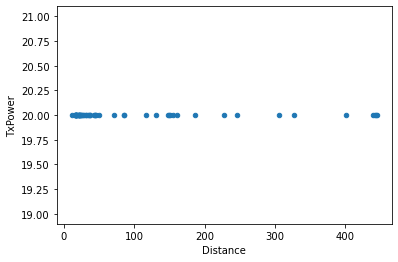

In [28]:
ax = plt.gca()

df.plot(kind='scatter',x='Distance',y='TxPower',ax=ax)

plt.show()


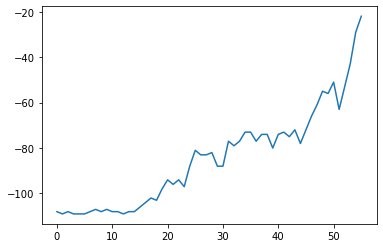

In [29]:

ts = pd.Series(df['PacketRSSI'])
ts.plot();

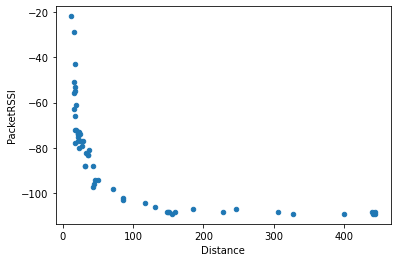

In [30]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='scatter',x='Distance',y='PacketRSSI',ax=ax)

plt.show()

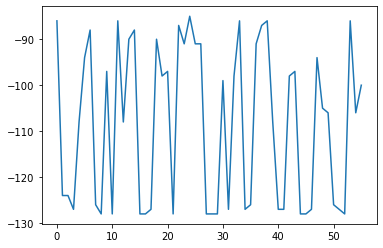

In [31]:
ts = pd.Series(df['RSSI'])
ts.plot();

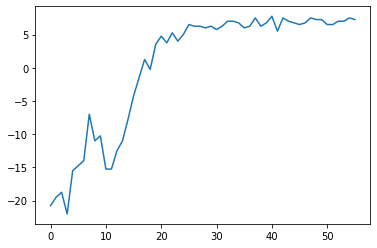

In [32]:
ts = pd.Series(df['SNR'])
ts.plot();

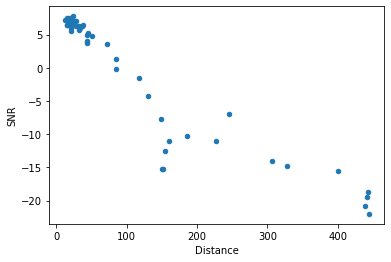

In [33]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='scatter',x='Distance',y='SNR',ax=ax)


plt.show()

In [34]:
# Get the current time the notebook 
now = datetime.datetime.now()
time_string = now.strftime("%Y-%m-%d %H:%M:%S")
print(time_string)

2021-10-05 15:54:00


In [35]:
# Used for basic mapping debugging
# If you would like to map a set of receiver/sender coordinates, follow this link to setup an api key:
# https://developers.google.com/maps/documentation/embed/get-api-key
# Store the key into the 'api_key' variable by plain text or by storing into a .txt file as below.
# It is recommended and good practice to store it in a separate text file as leaked api-keys are never a good thing.
# Uncomment the code below and run 



# api_file = open("api-key.txt", "r")
# api_key = api_file.read()
# api_file.close()

In [36]:

# embed = "https://www.google.com/maps/embed/v1/directions?key="+api_key+"&origin="+receiver+"&destination="+sender+"&mode=flying&center="+center+"&zoom=16"
# print(embed)

In [37]:
# IFrame(embed, width=600, height=600)

In [38]:
w = api.WeatherApi(search='perth+wa', debug=0)

location = w.location()
# check if the search produced a result (other methods will also return None if the search fails).
if location is None:
    sys.exit('Search failed for location ' + loc)

print(f"\nLocation: {location['name']} {location['state']}, timezone:{location['timezone']}\n")


Location: East Perth WA, timezone:Australia/Perth



In [39]:
for warn in w.warnings():
    print(f"Warning short title:  {warn['short_title']}")

    warning = w.warning(id=warn['id'])
    print(f"Warning title:        {warning['title']}")

In [40]:
observations = w.observations()
print(f"\nObservations (temp): {observations['temp']:2}")
print(f"\nObservations (humidity): {observations['humidity']:2}")


Observations (temp): 16.6

Observations (humidity): 57


In [41]:
print('\n3 Hourly:')
print('Note: Observations are from most recent to least. API is currently incorrect\n')

for f in w.forecasts_3hourly():
    print(f"{f['time']} temp:{f['temp']:2}, {f['icon_descriptor']}")


3 Hourly:
Note: Observations are from most recent to least. API is currently incorrect

2021-10-05T09:00:00Z temp:17, mostly_sunny
2021-10-05T12:00:00Z temp:14, mostly_sunny
2021-10-05T15:00:00Z temp:10, mostly_sunny
2021-10-05T18:00:00Z temp: 6, mostly_sunny
2021-10-05T21:00:00Z temp: 4, mostly_sunny
2021-10-06T00:00:00Z temp: 9, sunny
2021-10-06T03:00:00Z temp:15, sunny
2021-10-06T06:00:00Z temp:19, sunny
2021-10-06T09:00:00Z temp:18, sunny
2021-10-06T12:00:00Z temp:13, sunny
2021-10-06T15:00:00Z temp: 9, sunny
2021-10-06T18:00:00Z temp: 6, mostly_sunny
2021-10-06T21:00:00Z temp: 5, mostly_sunny
2021-10-07T00:00:00Z temp:11, mostly_sunny
2021-10-07T03:00:00Z temp:18, mostly_sunny
2021-10-07T06:00:00Z temp:21, mostly_sunny
